<a href="https://colab.research.google.com/github/sainisachin393/CTS-Python-/blob/main/python_for_data_science_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python For Data Science And Analysis


# Notes 3.1, Exploratory Data Analysis & Visualization
# Objectives
write a program which uses seaborn to:
* show univariate plots (eg., distplot)
* show multivariate plots (eg., scatterplot)
* EXTRA: customize plots
# Part 3: Visualization
# How do I use pandas to plot?
Pandas has a .plot which you configure using its arguments (eg., kind=hist), this however just uses seaborn.

In [1]:
import pandas as pd
ti=pd.read_csv('/titanic2.csv')
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


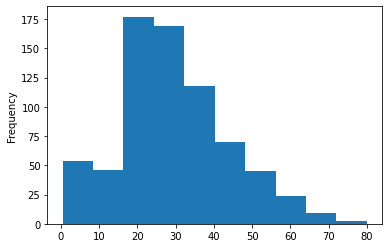

In [3]:
ti['age'].plot(kind='hist');

Often pandas doesn't choose the right plot, or the right dataseries... therefore it's often easier to go straight to using seaborn.

# How do I use seaborn to visualize data?

In [4]:
import seaborn as sns

# 
Checks for emptiness and cleanse data

In [5]:
ti.isna().sum() # checking the null values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# replacing null values in numerical fields with the mean values
ti=ti.fillna(ti.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [7]:
ti.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# fill every column with its own most frequent value
ti=ti.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [9]:
ti.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

There are two ways of using seaborn, you can either

supply x (, y, etc.) as individual arguments
OR: supply a dataframe and name the relevant columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


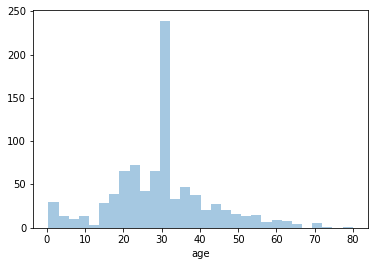

In [11]:
sns.distplot(ti['age'],kde=False);

What is the kde?
approximation of the distribution using a linear combination of normal distributions

further reading: https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


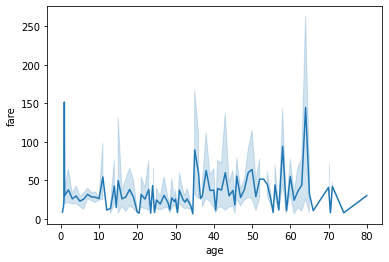

In [14]:
sns.lineplot(ti['age'],ti['fare'])

# How do I use a dataframe with seaborn?
We set data to be the dataframe, and name the columns for x and y...

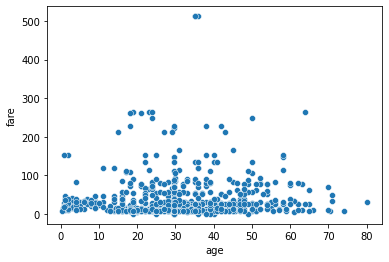

In [15]:
sns.scatterplot(data=ti,x='age',y='fare')

# How do I create a distribution plot?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


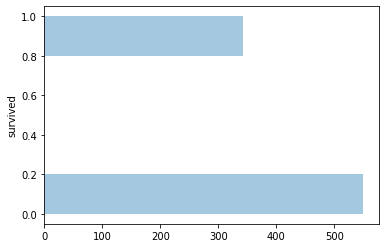

In [18]:
sns.distplot(ti['survived'],vertical=True,kde=False);

# How do I create a violin plot?
The width of a violin plot is the frequency (ie., how common) a value is within some column...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


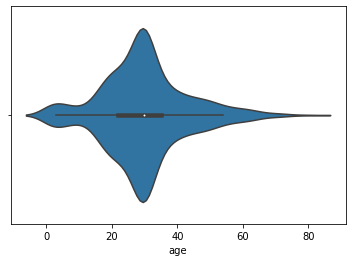

In [20]:
sns.violinplot(ti['age'])

# How do I create a box plot?
Box plots show quarties (25th, 50th, 75th) and outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


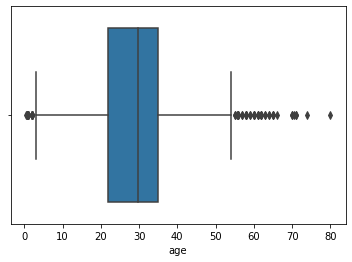

In [21]:
sns.boxplot(ti['age'])

# How do I create a violin plot for multiple columns?
A violin plot can show multiple distributions, each a subset of a single column, factored (or grouped) by another.

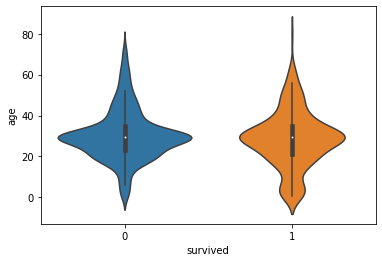

In [22]:
sns.violinplot(data=ti, x='survived', y='age')

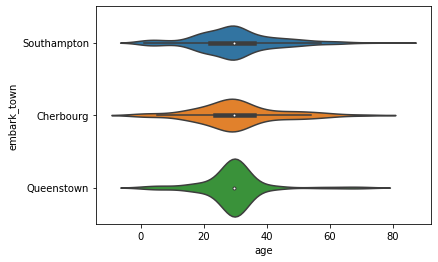

In [23]:
sns.violinplot(data=ti, x="age", y='embark_town')

# How do I create a bar plor for multiple columns?
Bar plots are useful for discrete data or for showing, here, the means:

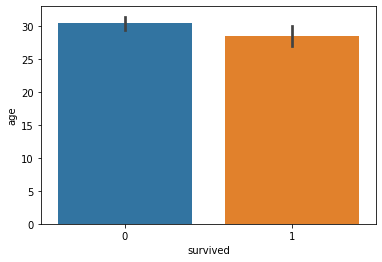

In [24]:
sns.barplot(data=ti, x='survived', y='age');

# How do I create a line plot?

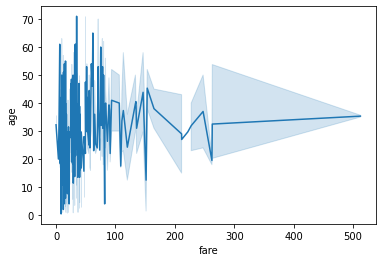

In [25]:
sns.lineplot(data=ti, x='fare', y='age');

# How do I create a scatter plot?

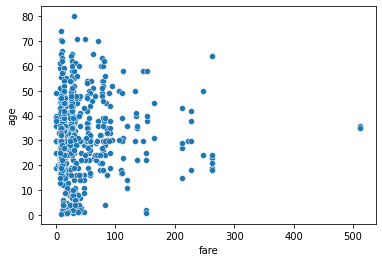

In [27]:
sns.scatterplot(data=ti, x='fare', y='age');

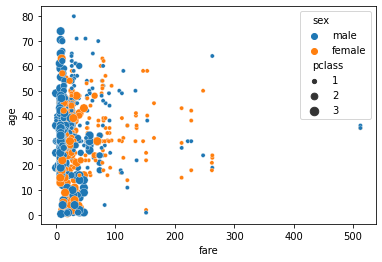

In [28]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

# EXTRA: Tips
* Often for the sake of communication, using excel is both faster and leads to better visuals
* use df.to_csv() to save the data behind a visual
* use excel to heavily customize the layout (and then, eg., copy powerpoint)

In [29]:
ti.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,C,Southampton,no,False


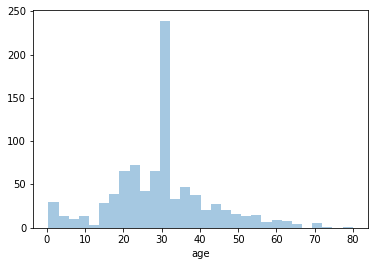

In [33]:
sns.distplot(ti['age'],kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


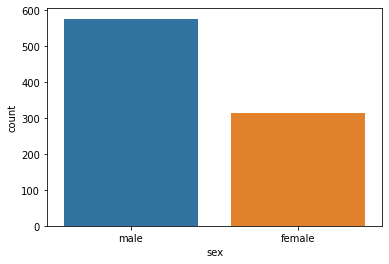

In [39]:
sns.countplot(ti['sex'])

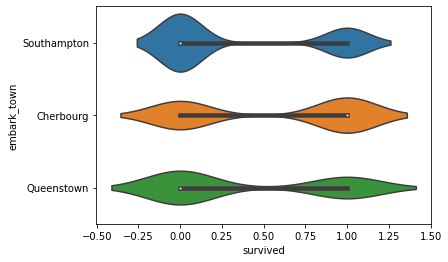

In [42]:
sns.violinplot(data=ti,x='survived',y='embark_town')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


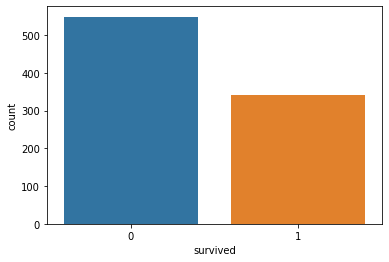

In [45]:
sns.countplot(ti['survived'])

We can see from above plot that approx 350 peoples survived on the titanic and 550 peoples did not survive.

In [47]:
ti['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [48]:
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


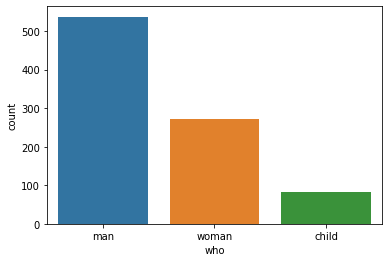

In [50]:
sns.countplot(ti['who']);

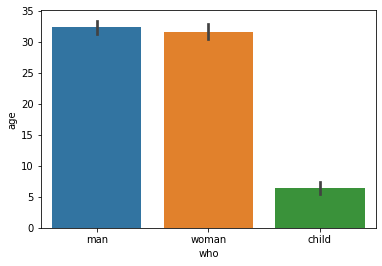

In [59]:
sns.barplot(data=ti,y='age',x='who')

age of man - 0 to 32
age of woman - 0 to 30
age of child - 0 to 5




# Plotting on Univariate (single_cols)

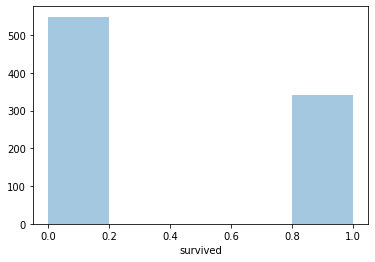

In [63]:
sns.distplot(ti['survived'],kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


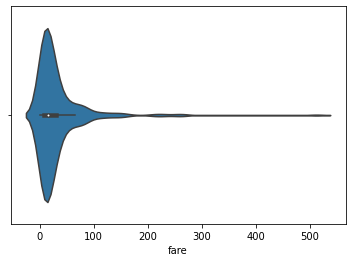

In [64]:
sns.violinplot(ti['fare']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


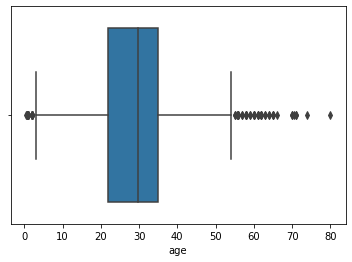

In [66]:
sns.boxplot(ti['age'])

# Multivariate(2 Cols)

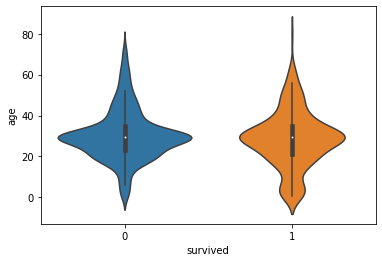

In [68]:
sns.violinplot(data=ti,y='age',x='survived');

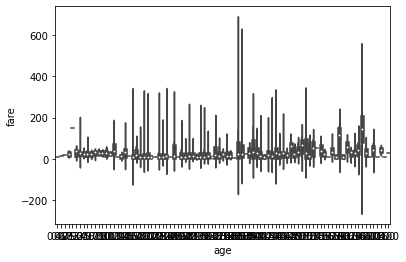

In [70]:
sns.violinplot(data=ti,y='fare',x='age');

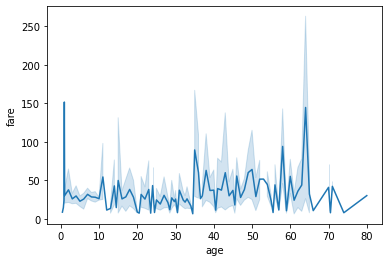

In [72]:
sns.lineplot(y=ti.fare,x=ti.age)

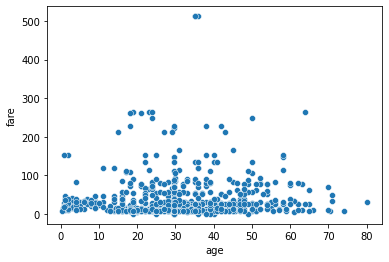

In [73]:
sns.scatterplot(x=ti.age,y=ti.fare)